In [19]:
%config Completer.use_jedi = False

In [20]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random

In [21]:
# import the necessary packages
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras import datasets

In [22]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [23]:
def show_dataset(x_train):
    img_rows, img_cols = x_train.shape[1], x_train.shape[2]
    col1 = 10
    row1 = 1

    # Show a few sample digits from the training set
    plt.rcParams['figure.figsize'] = (1.0, 1.0) # set default size of plots
    col2 = 20
    row2 = 5
    fig = plt.figure(figsize=(col2, row2))
    for index in range(col1*row1, col1*row1 + col2*row2):
        fig.add_subplot(row2, col2, index - col1*row1 + 1)
        plt.axis('off')
        plt.imshow(x_train[index]) # index of the sample picture
    plt.show()
    

def print_history_chart(history):
    accuracy =history.history['accuracy']
    val_accuracy =history.history['val_accuracy']
    
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']


    loss = history.history['loss']
    val_loss = history.history['val_loss']
    plt.plot(range(1,len(accuracy)+1),accuracy,color='red',label = "Training Accuracy")
    plt.plot(range(1,len(accuracy)+1),val_accuracy,color='blue',label = "Validation Accuracy")
    plt.ylabel('accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    
    plt.subplot(2, 1, 2)
    plt.plot(range(1,len(accuracy)+1),loss,color='red',label = "Training Loss")
    plt.plot(range(1,len(accuracy)+1),val_loss,color='blue',label = "Validation Loss")
    plt.ylabel('Cross Entropy')
    plt.title('Model')
    plt.legend()
    plt.title('Training and Validation Loss')

In [24]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [25]:
train_images.shape

(50000, 32, 32, 3)

In [26]:
train_labels.shape

(50000, 1)

In [27]:
test_images.shape

(10000, 32, 32, 3)

In [28]:
train_images.astype('float32') 
test_images.astype('float32') 

train_images = train_images/255.
test_images = test_images/255.

# Vanilla network

In [11]:
def build_vanilla_model(shape, class_num):
    # specify the inputs for the feature extractor network
    inputs = Input(shape)

    x = Conv2D(128, (3, 3), activation="relu")(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)
#     x = Dropout(0.1)(x)

    x = Conv2D(64, (2, 2), activation="relu")(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.2)(x)
    
    x = Flatten()(x)
    
    # prepare the final outputs
#     pooledOutput = GlobalAveragePooling2D()(x)

#     outputs = Dense(class_num)(pooledOutput)

    x = Dense(128, activation='relu')(x)
    outputs = Dense(class_num, activation='softmax')(x)

    # build the model
    model = Model(inputs, outputs)
    
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

    return model

In [12]:
model = build_vanilla_model(train_images[0].shape, 10)

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0     

In [14]:
history = model.fit(train_images, train_labels, epochs=50, batch_size=512, 
                    validation_data=(test_images, test_labels))


Epoch 1/50


/home/matmozaur/.local/lib/python3.8/site-packages/tensorflow/python/keras/backend.py:4929: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


98/98 [==============================] - 11s 68ms/step - loss: 1.7508 - accuracy: 0.3721 - val_loss: 1.4540 - val_accuracy: 0.4814
Epoch 2/50
98/98 [==============================] - 6s 60ms/step - loss: 1.3605 - accuracy: 0.5188 - val_loss: 1.2793 - val_accuracy: 0.5438
Epoch 3/50
98/98 [==============================] - 6s 62ms/step - loss: 1.2386 - accuracy: 0.5646 - val_loss: 1.1948 - val_accuracy: 0.5796
Epoch 4/50
98/98 [==============================] - 6s 61ms/step - loss: 1.1579 - accuracy: 0.5952 - val_loss: 1.1331 - val_accuracy: 0.6075
Epoch 5/50
98/98 [==============================] - 6s 62ms/step - loss: 1.0908 - accuracy: 0.6179 - val_loss: 1.0745 - val_accuracy: 0.6343
Epoch 6/50
98/98 [==============================] - 6s 62ms/step - loss: 1.0428 - accuracy: 0.6356 - val_loss: 1.0632 - val_accuracy: 0.6293
Epoch 7/50
98/98 [==============================] - 6s 62ms/step - loss: 0.9982 - accuracy: 0.6502 - val_loss: 1.0136 - val_accuracy: 0.6546
Epoch 8/50
98/98 [=====

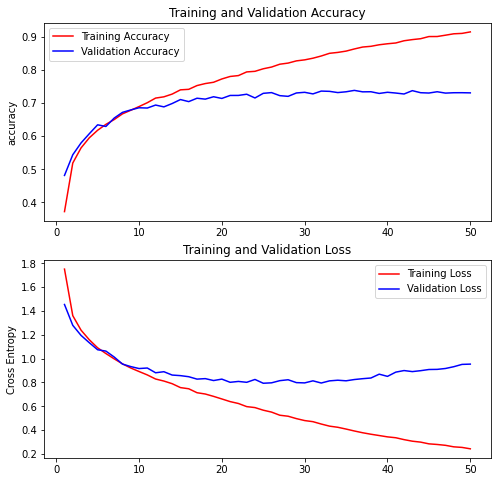

In [15]:
print_history_chart(history)

In [24]:
# model.save('vanilla_cifar10.h5')

In [46]:
model = tf.keras.models.load_model("vanilla_cifar10.h5")

In [47]:
model.evaluate(test_images, test_labels)[1]

313/313 [==============================] - 1s 2ms/step - loss: 0.9539 - accuracy: 0.7308


0.7307999730110168

# Siemese network

In [11]:
def build_siamese_vanilla_model(shape, class_num):
    inputs1 = Input(shape)
    inputs2 = Input(shape)
    
    def one_side(inputs):
        x = Conv2D(128, (3, 3), activation="relu")(inputs)
        x = MaxPooling2D(pool_size=(2, 2))(x)
    #     x = Dropout(0.1)(x)

        x = Conv2D(64, (2, 2), activation="relu")(x)
        x = MaxPooling2D(pool_size=(2,2))(x)
        x = Dropout(0.2)(x)

        x = Flatten()(x)

        x = Dense(128, activation='relu')(x)
        
        return x
    
    x1 = one_side(inputs1)
    x2 = one_side(inputs2)
    
#     x1 = Embedding()(x1)
#     x2 = Embedding()(x2)
    
#     x = Concatenate(axis=1)([inputs1, inputs2])
    x = concatenate([x1, x2])
    
    outputs = Dense(class_num, activation='softmax')(x)

    # build the model
    model = Model([inputs1, inputs2], outputs)
    
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

    return model

In [12]:
model = build_siamese_vanilla_model(train_images[0].shape, 10)

In [13]:
def make_pairs(images, labels):
    pairImages = []
    pairLabels = []

    numClasses = len(np.unique(labels))
    idx = [np.where(labels == i)[0] for i in range(0, numClasses)]

    for idxA in range(len(images)):
        currentImage = images[idxA]
        label = labels[idxA]
#         print(currentImage.shape, label)

        for idxB in random.sample(list(idx[label[0]]), 1):
            posImage = images[idxB]
#             print(posImage.shape)
#             print('\n\n\n')


            pairImages.append(np.array([currentImage, posImage]))
            pairLabels.append(np.array(label))
        
    return np.array(pairImages), np.array(pairLabels)

#     return np.array(pairImages), np.array(pairLabels)

In [14]:
# X1, y1 = train_images[:30000], train_labels[:30000]

In [15]:
X, y = make_pairs(train_images, train_labels)
# X, y = make_pairs(X1, y1)

In [16]:
# model.fit([train_images[:1000], train_images[:1000]], train_labels[:1000], epochs=50, batch_size=512, shuffle=True)
# for e in range(50):
#     model.fit([X[:,0,:], X[:,1,:]], y, epochs=1, batch_size=512, shuffle=True)
#     history = model.fit([train_images, train_images], train_labels, epochs=1, batch_size=512, shuffle=True,
#          validation_data=([test_images, test_images], test_labels))
#     histories.append(history)

In [32]:
# history1 = model.fit([X[:,0,:], X[:,1,:]], y, epochs=30, batch_size=512, shuffle=True,
#          validation_data=([test_images, test_images], test_labels))
# history2 = model.fit([train_images, train_images], train_labels, epochs=20, batch_size=512, shuffle=True,
#          validation_data=([test_images, test_images], test_labels))
history3 = model.fit([X[:,0,:], X[:,1,:]], y, epochs=20, batch_size=512, shuffle=True,
         validation_data=([test_images, test_images], test_labels))
history4 = model.fit([train_images, train_images], train_labels, epochs=10, batch_size=512, shuffle=True,
         validation_data=([test_images, test_images], test_labels))
history5 = model.fit([X[:,0,:], X[:,1,:]], y, epochs=10, batch_size=512, shuffle=True,
         validation_data=([test_images, test_images], test_labels))


Epoch 1/20
98/98 [==============================] - 14s 128ms/step - loss: 0.3409 - accuracy: 0.8955 - val_loss: 1.2794 - val_accuracy: 0.7100
Epoch 2/20
98/98 [==============================] - 11s 117ms/step - loss: 0.1642 - accuracy: 0.9423 - val_loss: 1.3510 - val_accuracy: 0.7213
Epoch 3/20
98/98 [==============================] - 12s 119ms/step - loss: 0.1140 - accuracy: 0.9591 - val_loss: 1.4030 - val_accuracy: 0.7201
Epoch 4/20
98/98 [==============================] - 12s 122ms/step - loss: 0.0764 - accuracy: 0.9732 - val_loss: 1.4615 - val_accuracy: 0.7271
Epoch 5/20
98/98 [==============================] - 12s 119ms/step - loss: 0.0583 - accuracy: 0.9796 - val_loss: 1.6304 - val_accuracy: 0.7207
Epoch 6/20
98/98 [==============================] - 11s 115ms/step - loss: 0.0518 - accuracy: 0.9820 - val_loss: 1.5806 - val_accuracy: 0.7261
Epoch 7/20
98/98 [==============================] - 11s 115ms/step - loss: 0.0413 - accuracy: 0.9861 - val_loss: 1.6398 - val_accuracy: 0.7241

In [ ]:
# print_history_chart(history)

In [43]:
# model.save('siamese_vanilla_cifar10.h5')

In [48]:
model = tf.keras.models.load_model("siamese_vanilla_cifar10.h5")


In [49]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 30, 30, 128)  3584        input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 30, 30, 128)  3584        input_4[0][0]                    
____________________________________________________________________________________________

In [45]:
model.evaluate([test_images, test_images], test_labels)[1]

313/313 [==============================] - 1s 3ms/step - loss: 1.8427 - accuracy: 0.7427


0.7426999807357788